# Sentiment Analysis

## Importar Librerías

In [130]:
#!pip install emoji
#!pip install uralicNLP
#!pip install hfst
#!pip install hfst-dev
#!pip install sentiment-analysis-spanish
#!pip install transformers
#!pip install wordcloud

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import emoji
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sentiment_analysis_spanish import sentiment_analysis

from transformers import pipeline

import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [132]:
#nltk.download('all')
#uralicApi.download("spa")

## Limpieza de Datos

In [133]:
df = pd.read_csv("data\Datathon 2024 - Reto Hey - Dataset Puìblico - Sheet1.csv")
df.shape

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_3284\785963788.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("data\Datathon 2024 - Reto Hey - Dataset Puìblico - Sheet1.csv")


(812, 3)

In [134]:
df.head(10)

,date,time,tweet
0,01/01/2023,NaN,"Resuelto, muchísimas gracias , excelente servi..."
1,02/01/2023,NaN,"Muchas gracias, espero su dm"
2,02/01/2023,NaN,Muchas gracias!
3,02/01/2023,NaN,Algo similar me paso. Quería renovar mi token ...
4,02/01/2023,NaN,Yeeeei! a través de mi cuenta en acabo de cont...
5,02/01/2023,NaN,Esta es la señal que necesitan para tener el m...
6,03/01/2023,NaN,Gracias 😁
7,03/01/2023,NaN,Muchas gracias 😊
8,03/01/2023,NaN,"Yo no sé mucho, pero te recomiendo la Inversió..."
9,04/01/2023,NaN,Gracias por la playera que me dieron en Galerí...


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    812 non-null    object
 1   time    424 non-null    object
 2   tweet   812 non-null    object
dtypes: object(3)
memory usage: 19.2+ KB


In [136]:
df["car"] = [len(msg) for msg in df["tweet"]]
df["pal"] = [len(msg.split()) for msg in df["tweet"]]

In [137]:
df.head(10)

,date,time,tweet,car,pal
0,01/01/2023,NaN,"Resuelto, muchísimas gracias , excelente servi...",62,8
1,02/01/2023,NaN,"Muchas gracias, espero su dm",28,5
2,02/01/2023,NaN,Muchas gracias!,15,2
3,02/01/2023,NaN,Algo similar me paso. Quería renovar mi token ...,159,28
4,02/01/2023,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,252,47
5,02/01/2023,NaN,Esta es la señal que necesitan para tener el m...,69,13
6,03/01/2023,NaN,Gracias 😁,9,2
7,03/01/2023,NaN,Muchas gracias 😊,16,3
8,03/01/2023,NaN,"Yo no sé mucho, pero te recomiendo la Inversió...",182,36
9,04/01/2023,NaN,Gracias por la playera que me dieron en Galerí...,53,10


### Algunas Gráficas Iniciales

C:\Users\juanj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Cantidad de Caracteres'), Text(0, 0.5, 'Conteo')]

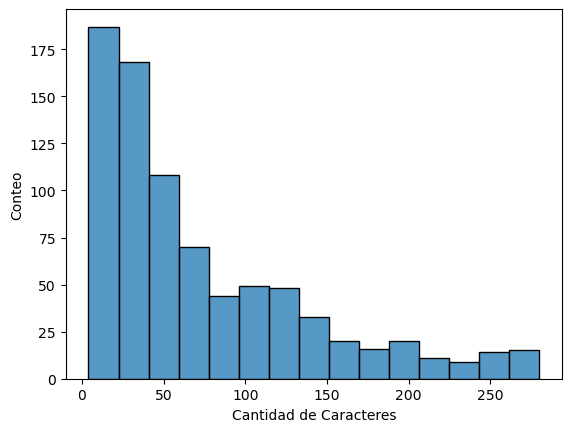

In [138]:
# Equivalente a:
sns.histplot(x = "car", data = df).set(xlabel='Cantidad de Caracteres', ylabel='Conteo')

# Convertir a svg:
plt.savefig(r'.\img\caracteres.svg')

C:\Users\juanj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Cantidad de Palabras'), Text(0, 0.5, 'Conteo')]

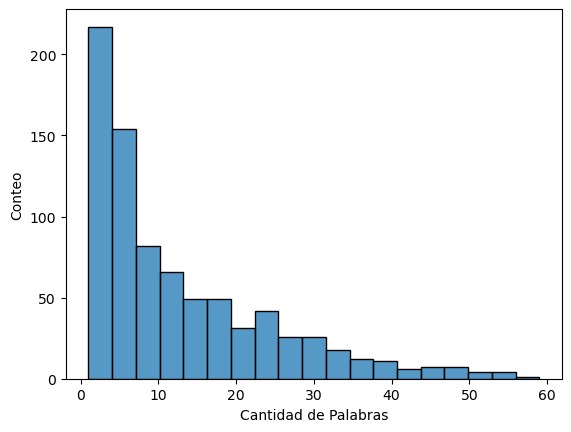

In [139]:
# Equivalente a:
sns.histplot(x = "pal", data = df).set(xlabel='Cantidad de Palabras', ylabel='Conteo')

# Convertir a svg:
plt.savefig(r'.\img\palabras.svg')

In [140]:
df.sort_values(by = 'pal', ascending = True).head(20)

,date,time,tweet,car,pal
81,25/01/2023,NaN,Gracias!!!,10,1
201,08/03/2023,NaN,Gracias!,8,1
256,24/03/2023,NaN,Gracias!,8,1
202,08/03/2023,NaN,Listo!!!,8,1
207,09/03/2023,NaN,ayuda!!!,8,1
250,22/03/2023,NaN,Gracias,7,1
715,11/01/2024,15:20:48,Gracias,7,1
740,26/01/2024,17:41:58,Jajaja,6,1
215,13/03/2023,NaN,Gracias!,8,1
562,02/10/2023,19:50:21,Gracias,7,1


In [141]:
df.sort_values(by = 'pal', ascending = False).head(20)

,date,time,tweet,car,pal
745,01/02/2024,00:51:32,"de debito puedes pedir nu desde la app, tmb he...",277,59
95,28/01/2023,NaN,"Amistad, usa si usas tu tarjeta 6 veces al mes...",268,54
620,31/10/2023,18:51:34,Lo verdaderamente interesante de heybanco es s...,271,54
777,16/03/2024,16:45:25,Hice por mail una sugerencia en la app en cuan...,276,53
55,18/01/2023,NaN,💰La sexta opción está opción es de las mejores...,268,53
217,13/03/2023,NaN,Me siguen hablando en horario laboral.El que s...,276,52
784,27/03/2024,20:47:08,Yo sí recomiendo! Aunque siento que es difícil...,276,52
434,06/07/2023,05:06:15,"ay suena súper bien, justo lo que me anda gust...",268,52
27,10/01/2023,NaN,"Es de 35,000 UDIS (184,000).De todas las plata...",273,51
393,16/06/2023,18:03:36,He probado 4 bancos tradicionales diferentes y...,261,49


### Desemojizar

In [142]:
for i in range(len(df)):
    df.loc[i,'tweet'] = emoji.demojize(df.loc[i,'tweet'], language='es')

In [143]:
df

,date,time,tweet,car,pal
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi...",62,8
1,2023-01-02,NaN,"Muchas gracias, espero su dm",28,5
2,2023-01-02,NaN,Muchas gracias!,15,2
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...,159,28
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,252,47
...,...,...,...,...,...
807,2024-04-21,15:21:43,"Ahora confirmo, gracias estimado",32,4
808,2024-04-23,22:52:05,:cara_desanimada: de acuerdo!! Muchas gracias.,30,5
809,2024-04-23,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...",149,32
810,2024-04-25,00:51:24,"una duda, con quién tengo que ver si tengo pro...",195,38


## Sentiment Analysis

### Preprocesar Texto

In [144]:
# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('spanish')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    
    
    # ----------- LIMPIAR CARACTERES Y PALABRAS ----------------
    processed_text = processed_text.replace(',', '')
    processed_text = processed_text.replace('.', '')
    processed_text = processed_text.replace(':', '')
    processed_text = processed_text.replace(',', '')
    processed_text = processed_text.replace('!', '')
    processed_text = processed_text.replace('¡', '')
    #processed_text = processed_text.replace('gracias', '')
    #processed_text = processed_text.replace('muchas', '')
    
    #processed_text = processed_text.replace('_', ' ')
    #processed_text = processed_text.replace('cara', '')
    

    return processed_text

In [146]:
df['reviewText'] = df['tweet'].apply(preprocess_text)
# Eliminar las filas con texto vacío
df = df.loc[df['reviewText'] != '', :]
df

,date,time,tweet,car,pal,reviewText
0,01/01/2023,NaN,"Resuelto, muchísimas gracias , excelente servi...",62,8,resuelto muchísimas gracias excelente servic...
1,02/01/2023,NaN,"Muchas gracias, espero su dm",28,5,muchas gracias espero dm
2,02/01/2023,NaN,Muchas gracias!,15,2,muchas gracias
3,02/01/2023,NaN,Algo similar me paso. Quería renovar mi token ...,159,28,similar paso quería renovar token poder hacer...
4,02/01/2023,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,252,47,yeeeei través cuenta acabo contratar cuenta a...
...,...,...,...,...,...,...
807,21/04/2024,15:21:43,"Ahora confirmo, gracias estimado",32,4,ahora confirmo gracias estimado
808,23/04/2024,22:52:05,:cara_desanimada: de acuerdo!! Muchas gracias.,30,5,cara_desanimada acuerdo muchas gracias
809,23/04/2024,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...",149,32,tío van graduar tdc garantizada hace año saqu...
810,25/04/2024,00:51:24,"una duda, con quién tengo que ver si tengo pro...",195,38,duda quién ver si problemas aumentar línea cr...


### NLTK Sentiment Analysis

In [147]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function
df['sentNLTK'] = df['reviewText'].apply(get_sentiment)

C:\Users\juanj\AppData\Local\Temp\ipykernel_16444\1845466612.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentNLTK'] = df['reviewText'].apply(get_sentiment)


### SentimentAnalysisSpanish

In [148]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
#print(sentiment.sentiment("me gusta la tombola es genial"))

df['sentSpnsh'] = df['reviewText'].apply(sentiment.sentiment)

C:\Users\juanj\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\juanj\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\juanj\AppData\Local\Temp\ipykernel_16444\1901073572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [149]:
#wnl = WordNetLemmatizer()
#print(wnl.lemmatize('resting'))

In [150]:
#from uralicNLP import uralicApi
#print(uralicApi.lemmatize("poder","spa"))

In [151]:
#df[['reviewText', 'sentiment']].head(25)

### Sentiment Analysis Transformers

In [152]:
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

results = classifier(list(df['reviewText']))

#for i in range(len(results)):
#    print(df.loc[i, 'reviewText'])
#    print(f"polaridad: {results[i]['label']}, score: {round(results[i]['score'], 4)}")
    
results = [int(result['label'].split()[0]) for result in results]
df['sentTransf'] = results
df

Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
C:\Users\juan

,date,time,tweet,car,pal,reviewText,sentNLTK,sentSpnsh,sentTransf
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi...",62,8,resuelto muchísimas gracias excelente servic...,0,0.999168,5
1,2023-01-02,NaN,"Muchas gracias, espero su dm",28,5,muchas gracias espero dm,0,0.408846,5
2,2023-01-02,NaN,Muchas gracias!,15,2,muchas gracias,0,0.470564,5
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...,159,28,similar paso quería renovar token poder hacer...,1,0.062695,1
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,252,47,yeeeei través cuenta acabo contratar cuenta a...,0,0.003187,1
...,...,...,...,...,...,...,...,...,...
807,2024-04-21,15:21:43,"Ahora confirmo, gracias estimado",32,4,ahora confirmo gracias estimado,0,0.008521,5
808,2024-04-23,22:52:05,:cara_desanimada: de acuerdo!! Muchas gracias.,30,5,cara_desanimada acuerdo muchas gracias,0,0.302336,5
809,2024-04-23,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...",149,32,tío van graduar tdc garantizada hace año saqu...,0,0.123029,5
810,2024-04-25,00:51:24,"una duda, con quién tengo que ver si tengo pro...",195,38,duda quién ver si problemas aumentar línea cr...,0,0.000007,1


In [153]:
"""
classifier = pipeline('sentiment-analysis', 
                      model="nlptown/bert-base-multilingual-uncased-sentiment")

sentences = ["HeyBanco me hace muy feliz, es lo mejor",
            "Odio a todos, en especial a HeyBanco, es una basura",
            "Hoy tuve un problema con mi tarjeta de crédito, pero ya lo solucioné"]

results = classifier(sentences)
for result in results:
    print(f"polaridad: {result['label']}, score: {round(result['score'], 4)}")
    print(int(result['label'].split()[0]))

results = [int(result['label'].split()[0]) for result in results]
print(results)
"""

'\nclassifier = pipeline(\'sentiment-analysis\', \n                      model="nlptown/bert-base-multilingual-uncased-sentiment")\n\nsentences = ["HeyBanco me hace muy feliz, es lo mejor",\n            "Odio a todos, en especial a HeyBanco, es una basura",\n            "Hoy tuve un problema con mi tarjeta de crédito, pero ya lo solucioné"]\n\nresults = classifier(sentences)\nfor result in results:\n    print(f"polaridad: {result[\'label\']}, score: {round(result[\'score\'], 4)}")\n    print(int(result[\'label\'].split()[0]))\n\nresults = [int(result[\'label\'].split()[0]) for result in results]\nprint(results)\n'

In [154]:
df.to_csv('contrasteSentimientos.csv', index=False)

Decidimos conservar el tercer análisis de sentimientos, pues resulta ser el más acertado, aunque la escala discreta no es tanto de nuestro agrado.

## Gráfica de Violín sobre Sentimientos en el Tiempo

In [233]:
#db['date'] = db['date']

#df['date'] = [pd.to_datetime(fecha, format='%Y-%m-%d') for fecha in df['date']]
#pd.to_datetime('2023-01-01', format='%Y-%m-%d')

In [234]:
df = pd.read_csv("contrasteSentimientos.csv")
df['Sentimiento'] = df['sentTransf']
df = df[['date', 'time', 'tweet', 'pal', 'reviewText', 'Sentimiento']]

In [235]:
for i in range(len(df['date'])):
    if pd.isna(df.loc[i, 'time']) or True: # Quitar el True para cambiar formato según si está disponible la hora
        df.loc[i, 'date'] = pd.to_datetime(df.loc[i, 'date'], format='%Y-%m-%d')
    else:
        df.loc[i, 'date'] = pd.to_datetime(df.loc[i, 'date'] + ' ' + df.loc[i, 'time'], format='%Y-%m-%d %H:%M:%S')

df.drop('time', axis = 1, inplace = True)
df

,date,tweet,pal,reviewText,Sentimiento
0,2023-01-01 00:00:00,"Resuelto, muchísimas gracias , excelente servi...",8,resuelto muchísimas gracias excelente servic...,5
1,2023-01-02 00:00:00,"Muchas gracias, espero su dm",5,muchas gracias espero dm,5
2,2023-01-02 00:00:00,Muchas gracias!,2,muchas gracias,5
3,2023-01-02 00:00:00,Algo similar me paso. Quería renovar mi token ...,28,similar paso quería renovar token poder hacer...,1
4,2023-01-02 00:00:00,Yeeeei! a través de mi cuenta en acabo de cont...,47,yeeeei través cuenta acabo contratar cuenta a...,1
...,...,...,...,...,...
806,2024-04-21 00:00:00,"Ahora confirmo, gracias estimado",4,ahora confirmo gracias estimado,5
807,2024-04-23 00:00:00,:cara_desanimada: de acuerdo!! Muchas gracias.,5,cara_desanimada acuerdo muchas gracias,5
808,2024-04-23 00:00:00,"Tío cuando me van a graduar, tengo la TDC gara...",32,tío van graduar tdc garantizada hace año saqu...,5
809,2024-04-25 00:00:00,"una duda, con quién tengo que ver si tengo pro...",38,duda quién ver si problemas aumentar línea cr...,1


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         811 non-null    object
 1   tweet        811 non-null    object
 2   pal          811 non-null    int64 
 3   reviewText   811 non-null    object
 4   Sentimiento  811 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 31.8+ KB


In [237]:
for i in range(len(df['Sentimiento'])):
    if df.loc[i, 'Sentimiento'] > 3:
        df.loc[i, 'Positivo'] = 1
        df.loc[i, 'Negativo'] = 0
    else:
        df.loc[i, 'Positivo'] = 0
        df.loc[i, 'Negativo'] = 1


df2 = df[['date', 'Positivo', 'Negativo']].groupby(['date']).sum()

In [238]:
df2.to_csv('sentimientosPorFecha.csv', index=True)

El siguiente código es una demostración de la aplicación con flet

## Clasificación de Relevancia

[Text(0.5, 0, 'Sentimiento'), Text(0, 0.5, 'Cantidad de Palabras')]

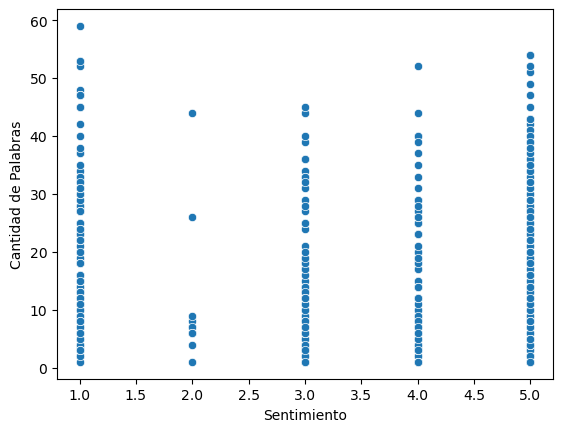

In [239]:
# Equivalente a:
sns.scatterplot(x = "Sentimiento", y = "pal", data = df).set(xlabel='Sentimiento', ylabel='Cantidad de Palabras')

## Nube de Palabras

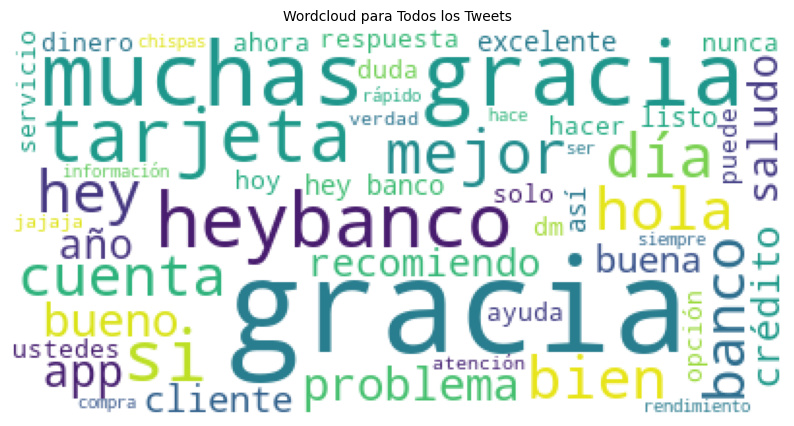

In [240]:
# Combine all reviews
reviews = " ".join([review for review in df['reviewText']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud para Todos los Tweets', fontsize=10)
plt.axis('off')
plt.show()

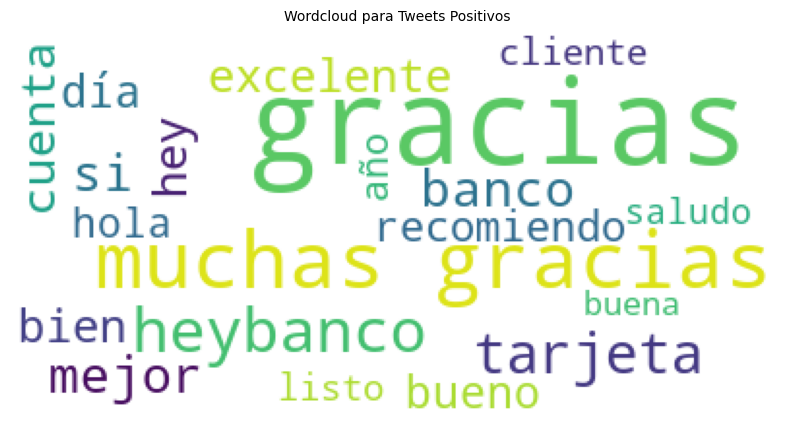

In [241]:
# Combine all reviews
reviews = " ".join([review for review in df.loc[df['Positivo'] == 1, 'reviewText']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=20)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud para Tweets Positivos', fontsize=10)
plt.axis('off')
plt.show()

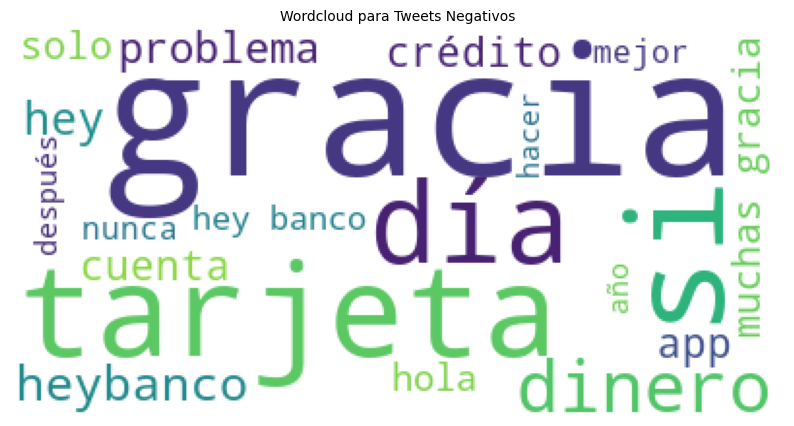

In [242]:
# Combine all reviews
reviews = " ".join([review for review in df.loc[df['Sentimiento'] == 1, 'reviewText']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=20)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud para Tweets Negativos', fontsize=10)
plt.axis('off')
plt.show()

## Modelo para Predecir Sentimientos

In [249]:
dfSVM = df[['tweet', 'Positivo']]

In [250]:
dfSVM

,tweet,Positivo
0,"Resuelto, muchísimas gracias , excelente servi...",1.0
1,"Muchas gracias, espero su dm",1.0
2,Muchas gracias!,1.0
3,Algo similar me paso. Quería renovar mi token ...,0.0
4,Yeeeei! a través de mi cuenta en acabo de cont...,0.0
...,...,...
806,"Ahora confirmo, gracias estimado",1.0
807,:cara_desanimada: de acuerdo!! Muchas gracias.,1.0
808,"Tío cuando me van a graduar, tengo la TDC gara...",1.0
809,"una duda, con quién tengo que ver si tengo pro...",0.0


**Partir en Conjunto de Train y Test:**

In [251]:
from sklearn.model_selection import train_test_split

# Separar variables independientes de la dependiente
X = dfSVM.copy()[dfSVM.columns[:-1]]
y = dfSVM['Positivo']

# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 31)

**Balanceo de Clases:**

1.0

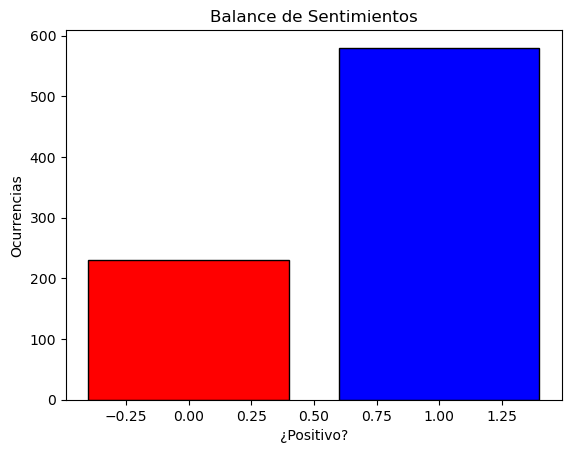

In [252]:
plt.bar(y.value_counts().index, y.value_counts()[:],
        edgecolor = ["black",[0,0,0]],
        color = ["blue", "red"]
       )
plt.xlabel("¿Positivo?")
plt.ylabel("Ocurrencias")
plt.title("Balance de Sentimientos")
y.value_counts().index[0]

In [253]:
from imblearn.over_sampling import RandomOverSampler
over_rand = RandomOverSampler(random_state=42)
X_train, y_train = over_rand.fit_resample(X_train, y_train)
y_train.value_counts()

Positivo
0.0    461
1.0    461
Name: count, dtype: int64

1.0

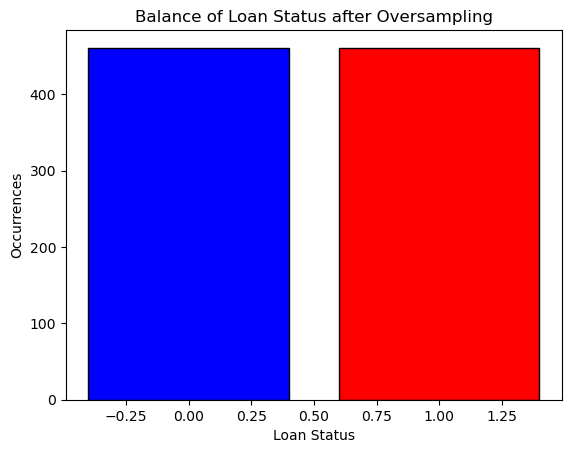

In [254]:
plt.bar(y_train.value_counts().index, y_train.value_counts()[:],
        edgecolor = ["black",[0,0,0]],
        color = ["blue", "red"]
       )
plt.xlabel("Loan Status")
plt.ylabel("Occurrences")
plt.title("Balance of Loan Status after Oversampling")
y.value_counts().index[0]

**Support Vector Machine:**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import flet as ft
from flet import View, Page, AppBar, 

matplotlib.use("svg")

def main(page: ft.Page):
    page.title="sentiment analysis"
    img = ft.Image(
        src=r'img\caracteres.svg'
    )

    page.add(img)
    page.update()

ft.app(target=main)

RuntimeError: asyncio.run() cannot be called from a running event loop